# Рабочая тетрадь 4
## Лищенко Т.В. ИМБО-01-22

# 1.1. Теоретический материал – Линейные регрессионные модели

Линейная регрессия (Linear regression) – модель зависимости переменной
x от одной или нескольких других переменных (факторов, регрессоров,
независимых переменных) с линейной функцией зависимости. Линейная
регрессия относится к задаче определения «линии наилучшего соответствия»
через набор точек данных и стала простым предшественником нелинейных
методов, которые используют для обучения нейронных сетей.

Цель линейной регрессии — поиск линии, которая наилучшим образом
соответствует этим точкам. Напомним, что общее уравнение для прямой есть
𝑓 (𝑥) = 𝑏 + 𝑚 ⋅ 𝑥 +, где 𝑚 – наклон линии, а 𝑏 – его сдвиг.

**Функция потерь — метод наименьших квадратов**

Функция потерь – это мера количества ошибок, которые наша линейная
регрессия делает на наборе данных. Хотя есть разные функции потерь, все они
вычисляют расстояние между предсказанным значением 𝑦(х) и его
фактическим значением.

Одна очень распространенная функция потерь называется средней
квадратичной ошибкой MSE. Чтобы вычислить MSE, мы просто берем все
значения ошибок, считаем их квадраты длин и усредняем.

**Задача экраполяции**

Допустим у нас есть много экспериментальных точек. Необходимо через
них провести кривую, которая как можно ближе проходила к этим точкам. При
этом необходимо минимизировать среднюю квадратичную ошибку (MSE).

Для решения данной задачи в Python есть множество библиотек. Самыми
распостраненными выступают:

**numpy - numpy.linalg.lstsq**

**scipy - scipy.linalg** (содержит все функции из numpy.linalg плюс часть
новых функций, которых нет в numpy.linalg).


## 1.1.1 Пример

In [1]:
%matplotlib inline

In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
x = np.array([0, 1, 2, 3])
y = np.array([-1, .2, .9, 2.1])

# Перепишем линейное уравнение y = mx + c как y = ap, где a = [[x],[1]], p = [[m], [c]]
# Простроим a по x:
a = np.vstack([x, np.ones(len(x))]).T
a

array([[0., 1.],
       [1., 1.],
       [2., 1.],
       [3., 1.]])

In [4]:
# Используем метод lstsq для решения его относительно вектора p
m, c = np.linalg.lstsq(a, y, rcond=None)[0]
m, c

(0.9999999999999997, -0.9499999999999987)

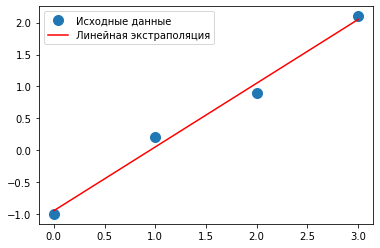

In [5]:
# Построим график полученной прямой и укажем на нем точки
plt.plot(x, y, 'o', label='Исходные данные', markersize=10)
plt.plot(x, m*x+c, 'r', label='Линейная экстраполяция')
plt.legend()
plt.show()

## 1.1.2 Пример

In [6]:
# Генерируем случайные x и y
delta = 1.
x = np.linspace(-5, 5, 11)
y = x**2+delta*(np.random.rand(11)-.5)
x += delta*(np.random.rand(11)-.5)

# Записываем данные в файл
x.tofile('x_data.txt', '\n')
y.tofile('y_data.txt', '\n')

In [7]:
# Читаем данные из файлов
x = np.fromfile('x_data.txt', float, sep='\n')
y = np.fromfile('y_data.txt', float, sep='\n')
print(x)
print(y)

[-5.17689753 -4.11822745 -2.79779611 -2.06575654 -1.46604473  0.36772424
  1.49901525  1.97647133  3.18847116  4.03502628  5.16899048]
[25.28917816 15.52780697  9.14498801  4.19988224  1.04539047  0.18593839
  0.93064088  4.23442634  9.31075734 16.09688383 25.32804537]


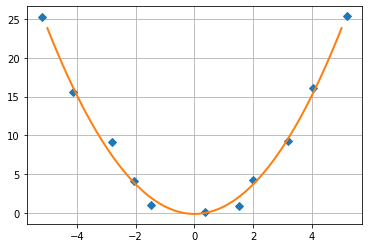

In [8]:
# Нахождение коэффициентов функции вида y = ax**2 + bx + c методом наименьших квадратов
# Задаем вектор m = [x**2, x, E]
m = np.vstack((x**2, x, np.ones(11))).T
# Находим коэффициенты при составляющих вектора m
s = np.linalg.lstsq(m, y, rcond=None)[0]

# На отрезке [-5, 5]
x_prec = np.linspace(-5, 5, 101)
# Рисуем точки
plt.plot(x, y, 'D')
# Рисуем кривую вида y = ax**2 + bx + c, подставляя из решения коэффициенты s[0], s[1], s[2]
plt.plot(x_prec, s[0]*x_prec**2 + s[1]*x_prec + s[2], '-', lw=2)
plt.grid()
plt.show()

## 1.1.3 Пример

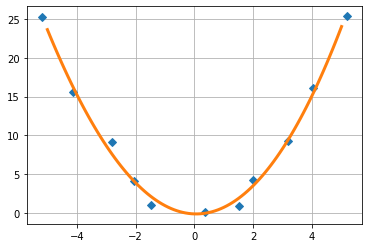

In [9]:
# Нахождение коэффициентов функции вида y = ax**3 + bx**2 + cx + d методом наименьших квадратов
# Задаем вектор m = [x**3, x**2, x, E]
m = np.vstack((x**3, x**2, x, np.ones(11))).T
# Находим коэффициенты при составляющих вектора m
s = np.linalg.lstsq(m, y, rcond=None)[0]

# На отрезке [-5, 5]
x_prec = np.linspace(-5, 5, 101)
# Рисуем точки
plt.plot(x, y, 'D')
# Рисуем кривую вида y = ax**3 + bx**2 + cx + d, подставляя из решения коэффициенты s[0], s[1], s[2], s[3]
plt.plot(x_prec, s[0]*x_prec**3 + s[1]*x_prec**2 + s[2]*x_prec + s[3], '-', lw=3)
plt.grid()
plt.show()

## 1.2.1 Задание

In [10]:
import pandas as pd
import scipy.interpolate  
import numpy as np

In [11]:
data = pd.read_csv('./test.csv', sep=',')

In [12]:
data.head()

,x,y
0,77,79.775152
1,21,23.177279
2,22,25.609262
3,20,17.857388
4,36,41.849864


## 1.1.4 Пример

In [13]:
from scipy.optimize import curve_fit

In [14]:
# Добавим шума в данные, сделанные по функции f(x, b) с коэффициентами b = (0.25, 0.75, 0.5)
beta = (0.25, 0.75, 0.5)
def f(x, b0, b1, b2):
    return b0 + b1 * np.exp(-b2 * x**2)
# Зададим массив точек xi
xdata = np.linspace(0, 5, 50)
# Создаем теоретически правильные значения точек yi (без шума)
y = f(xdata, *beta)
# Зашумляем эти данные
ydata = y + .05 * np.random.randn(len(xdata))


In [15]:
# Используем функцию для получения решения в виде коэффициентов функции f(x) для указанных xdata и ydata
beta_opt, beta_cov = curve_fit(f, xdata, ydata)
beta_opt

array([0.26093726, 0.74497911, 0.52389679])

In [16]:
# Вычислим линейное отклонение
lin_dev = sum(beta_cov[0])
print(lin_dev)

# Вычислим квадратичное отклонение
residuals = ydata - f(xdata, *beta_opt)
fres = sum(residuals**2)
print(fres)

0.0002526742348003105
0.1279328745164587


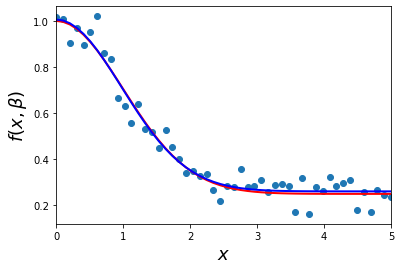

In [17]:
fig, ax = plt.subplots()
ax.scatter(xdata, ydata)
ax.plot(xdata, y, 'r', lw=2)
ax.plot(xdata, f(xdata, *beta_opt), 'b', lw=2)
ax.set_xlim(0, 5)
ax.set_xlabel(r"$x$", fontsize=18)
ax.set_ylabel(r"$f(x, \beta$)", fontsize=18)
plt.show()

## 1.1.5 Пример

[0.2509771 0.7499325]
0.00010160902534997686
0.08934586776341549


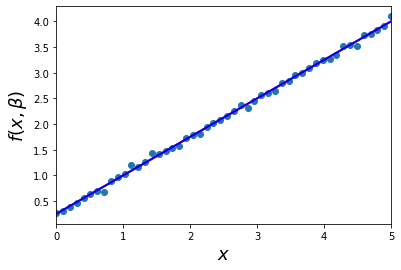

In [18]:
#1
# Добавим шума в данные, сделанные по функции f(x, b) с коэффициентами b = (0.25, 0.75)
beta = (0.25, 0.75)
def f(x, b0, b1):
    return b0 + b1 * x
# Зададим массив точек xi
xdata = np.linspace(0, 5, 50)
# Создаем теоретически правильные значения точек yi (без шума)
y = f(xdata, *beta)
# Зашумляем эти данные
ydata = y + .05 * np.random.randn(len(xdata))

# Используем функцию для получения решения в виде коэффициентов функции f(x) для указанных xdata и ydata
beta_opt, beta_cov = curve_fit(f, xdata, ydata)
print(beta_opt)

# Вычислим линейное отклонение
lin_dev = sum(beta_cov[0])
print(lin_dev)

# Вычислим квадратичное отклонение
residuals = ydata - f(xdata, *beta_opt)
fres = sum(residuals**2)
print(fres)

fig, ax = plt.subplots()
ax.scatter(xdata, ydata)
ax.plot(xdata, y, 'r', lw=2)
ax.plot(xdata, f(xdata, *beta_opt), 'b', lw=2)
ax.set_xlim(0, 5)
ax.set_xlabel(r"$x$", fontsize=18)
ax.set_ylabel(r"$f(x, \beta$)", fontsize=18)
plt.show()

[0.25178239 0.75271021 0.49835544]
0.00015286358058359066
0.12747221991716925


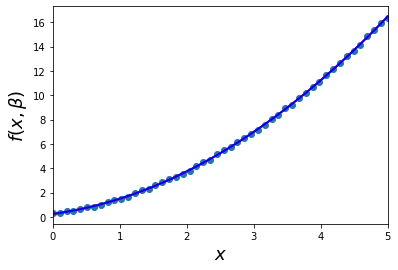

In [19]:
#2
# Добавим шума в данные, сделанные по функции f(x, b) с коэффициентами b = (0.25, 0.75, 0.5)
beta = (0.25, 0.75, 0.5)
def f(x, b0, b1, b2):
    return b0 + b1 * x + b2 * x**2
# Зададим массив точек xi
xdata = np.linspace(0, 5, 50)
# Создаем теоретически правильные значения точек yi (без шума)
y = f(xdata, *beta)
# Зашумляем эти данные
ydata = y + .05 * np.random.randn(len(xdata))

# Используем функцию для получения решения в виде коэффициентов функции f(x) для указанных xdata и ydata
beta_opt, beta_cov = curve_fit(f, xdata, ydata)
print(beta_opt)

# Вычислим линейное отклонение
lin_dev = sum(beta_cov[0])
print(lin_dev)

# Вычислим квадратичное отклонение
residuals = ydata - f(xdata, *beta_opt)
fres = sum(residuals**2)
print(fres)

fig, ax = plt.subplots()
ax.scatter(xdata, ydata)
ax.plot(xdata, y, 'r', lw=2)
ax.plot(xdata, f(xdata, *beta_opt), 'b', lw=2)
ax.set_xlim(0, 5)
ax.set_xlabel(r"$x$", fontsize=18)
ax.set_ylabel(r"$f(x, \beta$)", fontsize=18)
plt.show()

[1.0064686  1.99797982]
6.803376938713728e-05
0.15732409663304409


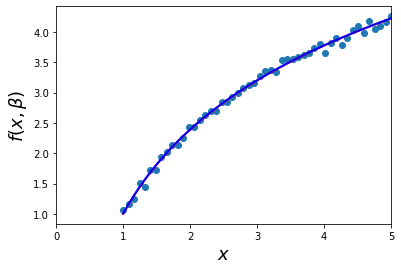

In [20]:
#3
# Добавим шума в данные, сделанные по функции f(x, b) с коэффициентами b = (1, 2)
beta = (1, 2)
def f(x, b0, b1):
    return b0 + b1 * np.log(x)
# Зададим массив точек xi
xdata = np.linspace(1, 5, 50)
# Создаем теоретически правильные значения точек yi (без шума)
y = f(xdata, *beta)
# Зашумляем эти данные
ydata = y + .05 * np.random.randn(len(xdata))

# Используем функцию для получения решения в виде коэффициентов функции f(x) для указанных xdata и ydata
beta_opt, beta_cov = curve_fit(f, xdata, ydata)
print(beta_opt)

# Вычислим линейное отклонение
lin_dev = sum(beta_cov[0])
print(lin_dev)

# Вычислим квадратичное отклонение
residuals = ydata - f(xdata, *beta_opt)
fres = sum(residuals**2)
print(fres)

fig, ax = plt.subplots()
ax.scatter(xdata, ydata)
ax.plot(xdata, y, 'r', lw=2)
ax.plot(xdata, f(xdata, *beta_opt), 'b', lw=2)
ax.set_xlim(0, 5)
ax.set_xlabel(r"$x$", fontsize=18)
ax.set_ylabel(r"$f(x, \beta$)", fontsize=18)
plt.show()

[1.00216882 1.99837561]
5.951235493348859e-06
0.1404778794227749


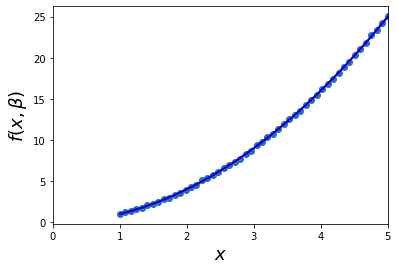

In [21]:
#4
# Добавим шума в данные, сделанные по функции f(x, b) с коэффициентами b = (1, 2)
beta = (1, 2)
def f(x, b0, b1):
    return b0 * x**b1
# Зададим массив точек xi
xdata = np.linspace(1, 5, 50)
# Создаем теоретически правильные значения точек yi (без шума)
y = f(xdata, *beta)
# Зашумляем эти данные
ydata = y + .05 * np.random.randn(len(xdata))

# Используем функцию для получения решения в виде коэффициентов функции f(x) для указанных xdata и ydata
beta_opt, beta_cov = curve_fit(f, xdata, ydata)
print(beta_opt)

# Вычислим линейное отклонение
lin_dev = sum(beta_cov[0])
print(lin_dev)

# Вычислим квадратичное отклонение
residuals = ydata - f(xdata, *beta_opt)
fres = sum(residuals**2)
print(fres)

fig, ax = plt.subplots()
ax.scatter(xdata, ydata)
ax.plot(xdata, y, 'r', lw=2)
ax.plot(xdata, f(xdata, *beta_opt), 'b', lw=2)
ax.set_xlim(0, 5)
ax.set_xlabel(r"$x$", fontsize=18)
ax.set_ylabel(r"$f(x, \beta)$", fontsize=18)
plt.show()

## Задание 1.2.2

# 1.2. Теоретический материал – Задачи регрессии

**Линейная регрессия** - это широко используемый метод статистического
анализа, который использует регрессионный анализ в математической
статистике для определения количественной взаимосвязи между двумя или
более переменными. Если регрессионный анализ включает две или более
независимых переменных, а связь между зависимой и независимой
переменными является линейной, тогда имееи дело с множественной линейной
регрессией.

В этом разделе мы увидим, как библиотеку Scikit-Learn в Python для машинного
обучения можно использовать для реализации функций регрессии. Мы начнем
с простой линейной регрессии с участием двух переменных, а затем перейдем к
линейной регрессии с участием нескольких переменных.


## 2.2.1 Пример

In [22]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [23]:
# Создадим набор данных для описания взаимосвязи между временем обучения студентов и успеваемостью
my_dict = {'Учебное время': list(np.arange(.5, 5.55, .25)),
          'Оценка':[10, 22, 13, 43, 20, 22, 22, 33, 50, 62, 48, 55, 75, 62, 73, 81, 76, 64, 82, 90, 93]}

dataset = pd.DataFrame(my_dict)
dataset.head()

,Учебное время,Оценка
0,0.50,10
1,0.75,22
2,1.00,13
3,1.25,43
4,1.50,20


In [24]:
# Исследуем набор данных
print(dataset.shape)
dataset.describe()

(21, 2)


,Учебное время,Оценка
count,21.000000,21.000000
mean,3.000000,52.190476
std,1.551209,26.678866
min,0.500000,10.000000
25%,1.750000,22.000000
50%,3.000000,55.000000
75%,4.250000,75.000000
max,5.500000,93.000000


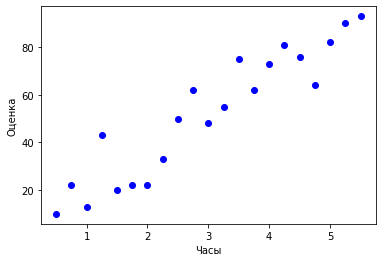

In [25]:
# Нарисуем точечную диаграмму
plt.scatter(dataset['Учебное время'], dataset['Оценка'], color = 'b', label = 'данные экзамена')
plt.xlabel('Часы')
plt.ylabel('Оценка')
plt.show()

In [26]:
x = dataset.iloc[:, :-1].values
y = dataset.iloc[:, 1].values
print(x)
print(y)

[[0.5 ]
 [0.75]
 [1.  ]
 [1.25]
 [1.5 ]
 [1.75]
 [2.  ]
 [2.25]
 [2.5 ]
 [2.75]
 [3.  ]
 [3.25]
 [3.5 ]
 [3.75]
 [4.  ]
 [4.25]
 [4.5 ]
 [4.75]
 [5.  ]
 [5.25]
 [5.5 ]]
[10 22 13 43 20 22 22 33 50 62 48 55 75 62 73 81 76 64 82 90 93]


In [27]:
# Теперь, когда у нас есть атрибуты и метки, необходимо разделить их на обучающий и тестовый наборы
# Приведенный фрагмент разделяет 80% данных на обучающий набор, а 20% данных - на набор тестов
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=.2, random_state=0)

In [28]:
# Далее можно обучить алгоритм линейной регрессии
# Необходимо импортировать класс LinearRegression, создать его экземпляр и вызвать метод fit()
regressor = LinearRegression()
regressor.fit(x_train, y_train)

LinearRegression()

In [29]:
# Приведем получившиеся коэффициенты для линии регрессии
print(regressor.intercept_)
print(regressor.coef_)


1.817974105102813
[16.61190295]


In [30]:
y_pred = regressor.predict(x_test)
# Сравним фактические значения с прогнозируемыми
df = pd.DataFrame({'Actual': y_test, 'Predicated': y_pred})
df

,Actual,Predicated
0,50,43.347731
1,62,64.112610
2,93,93.183440
3,22,14.276901
4,55,55.806659


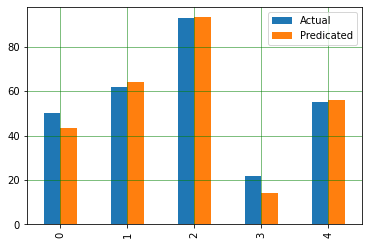

In [31]:
# Визуализируем результат сравнения в виде гистограммы
df.plot(kind='bar')
plt.grid(which='major', linestyle='-', linewidth='.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='.5', color='black')
plt.show()

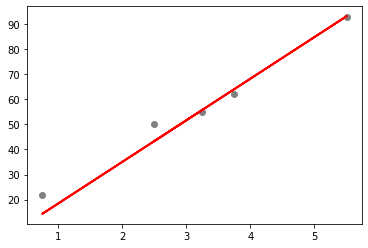

In [32]:
# Построим линию регрессии с тестовыми данными
plt.scatter(x_test, y_test, color='grey')
plt.plot(x_test, y_pred, color='red', linewidth=2)
plt.show()

## Задание 2.3.1

# 1.3. Теоретический материал – Множественная регрессия

В предыдущем примере мы проиллюстрировали линейную регрессию
с двумя переменными. Однако, почти все реальные задачи имеют больше
параметров. Линейная регрессия с участием нескольких переменных
называется «множественной линейной регрессией» или многомерной
линейной регрессией. Шаги для выполнения множественной линейной
регрессии аналогичны шагам для простой . Разница заключается в оценке.
Вы можете использовать множественную регрессию, чтобы узнать, какой
фактор оказывает наибольшее влияние на прогнозируемый результат или
как различные переменные связаны друг с другом.

## 3.2.1 Пример

In [33]:
y = [1, 2, 3, 4, 3, 4, 5, 3, 5, 5, 4, 5, 4, 5, 4, 5, 6, 0, 6, 3, 1, 3, 1]
x = [[0, 2, 4, 1, 5, 4, 5, 9, 9, 9, 3, 7, 8, 8, 6, 6, 5, 5, 5, 6, 6, 5, 5],
     [4, 1, 2, 3, 4, 5, 6, 7, 5, 8, 7, 8, 7, 8, 7, 8, 6, 8, 9, 2, 1, 5, 6],
     [4, 1, 2, 5, 6, 7, 8, 9, 7, 8, 7, 8, 7, 4, 3, 1, 2, 3, 4, 1, 3, 9, 7]]

x = np.transpose(x) # transpose so input vectors
x = np.c_[x, np.ones(x.shape[0])] #add bias term
linreg = np.linalg.lstsq(x, y, rcond=None)[0]
print(linreg)

[ 0.1338682   0.26840334 -0.02874936  1.5122571 ]


## 3.2.2 Пример

In [34]:
from sklearn import metrics

In [35]:
y = [1,2,3,4,3,4,5,3,5,5,4,5,4,5,4,5,6,0,6,3,1,3,1]
x = [[0,2,4,1,5,4,5,9,9,9,3,7,8,8,6,6,5,5,5,6,6,5,5],
[4,1,2,3,4,5,6,7,5,8,7,8,7,8,7,8,6,8,9,2,1,5,6],
[4,1,2,5,6,7,8,9,7,8,7,8,7,4,3,1,2,3,4,1,3,9,7]]
     
# формируем DataFrame из двух списков
new_y = np.array(y)
new_y = new_y.transpose()

df1 = pd.DataFrame(new_y)

new_x = np.array(x)
new_x = new_x.transpose()

df2 = pd.DataFrame(new_x)
df1 = df1.rename(columns= {0: 'y'}, inplace = False)
df2 = df2.rename(columns= {0: 'x1', 1: 'x2', 2: 'x3'}, inplace = False)

frames = [df1, df2]
dataset = pd.concat([df1, df2], axis=1, join='inner')
dataset

,y,x1,x2,x3
0,1,0,4,4
1,2,2,1,1
2,3,4,2,2
3,4,1,3,5
4,3,5,4,6
5,4,4,5,7
6,5,5,6,8
7,3,9,7,9
8,5,9,5,7
9,5,9,8,8


In [36]:
# Изучим данные
print(dataset.shape)
dataset.describe()

(23, 4)


,y,x1,x2,x3
count,23.000000,23.000000,23.000000,23.000000
mean,3.565217,5.347826,5.521739,5.043478
std,1.674029,2.404706,2.428422,2.704849
min,0.000000,0.000000,1.000000,1.000000
25%,3.000000,4.500000,4.000000,3.000000
50%,4.000000,5.000000,6.000000,5.000000
75%,5.000000,6.500000,7.500000,7.000000
max,6.000000,9.000000,9.000000,9.000000


In [37]:
# Разделим данные на метки и атрибуты
x = dataset[['x1', 'x2', 'x3']]
y = dataset['y']

In [38]:
# Разделим данные на обучающую и тестовую выборки
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=.2, random_state=0)

In [39]:
# Далее можно обучить алгоритм линейной регрессии
regressor = LinearRegression()
regressor.fit(x_train, y_train)

LinearRegression()

In [40]:
# Выведем коэффициенты модели
coeff_df = pd.DataFrame(regressor.coef_, x.columns, columns=['Coefficient'])
coeff_df

,Coefficient
x1,0.223219
x2,0.136709
x3,-0.063757


In [41]:
# Прогноз на тестовых данных
y_pred = regressor.predict(x_test)
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df

,Actual,Predicted
11,5,4.119478
10,4,3.153648
21,3,3.199155
14,4,4.078333
20,1,3.258079


In [42]:
# Последний шаг - оценить производительность алгоритма. Мы сделаем это, найдя значение для MSE
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))

Mean Squared Error: 1.3272699242343065


# 3.3.1 Задание

In [44]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

%matplotlib inline


dataset = pd.read_csv('./LReg.csv')

dataset.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [45]:
dataset.isnull().any()

id               False
date             False
price            False
bedrooms         False
bathrooms        False
sqft_living      False
sqft_lot         False
floors           False
waterfront       False
view             False
condition        False
grade            False
sqft_above       False
sqft_basement    False
yr_built         False
yr_renovated     False
zipcode          False
lat              False
long             False
sqft_living15    False
sqft_lot15       False
dtype: bool

In [46]:
dataset.dtypes

id                 int64
date              object
price            float64
bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
grade              int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
dtype: object

In [47]:
dataset = dataset.drop(['id','date'], axis = 1)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\axisgrid.py:2076: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


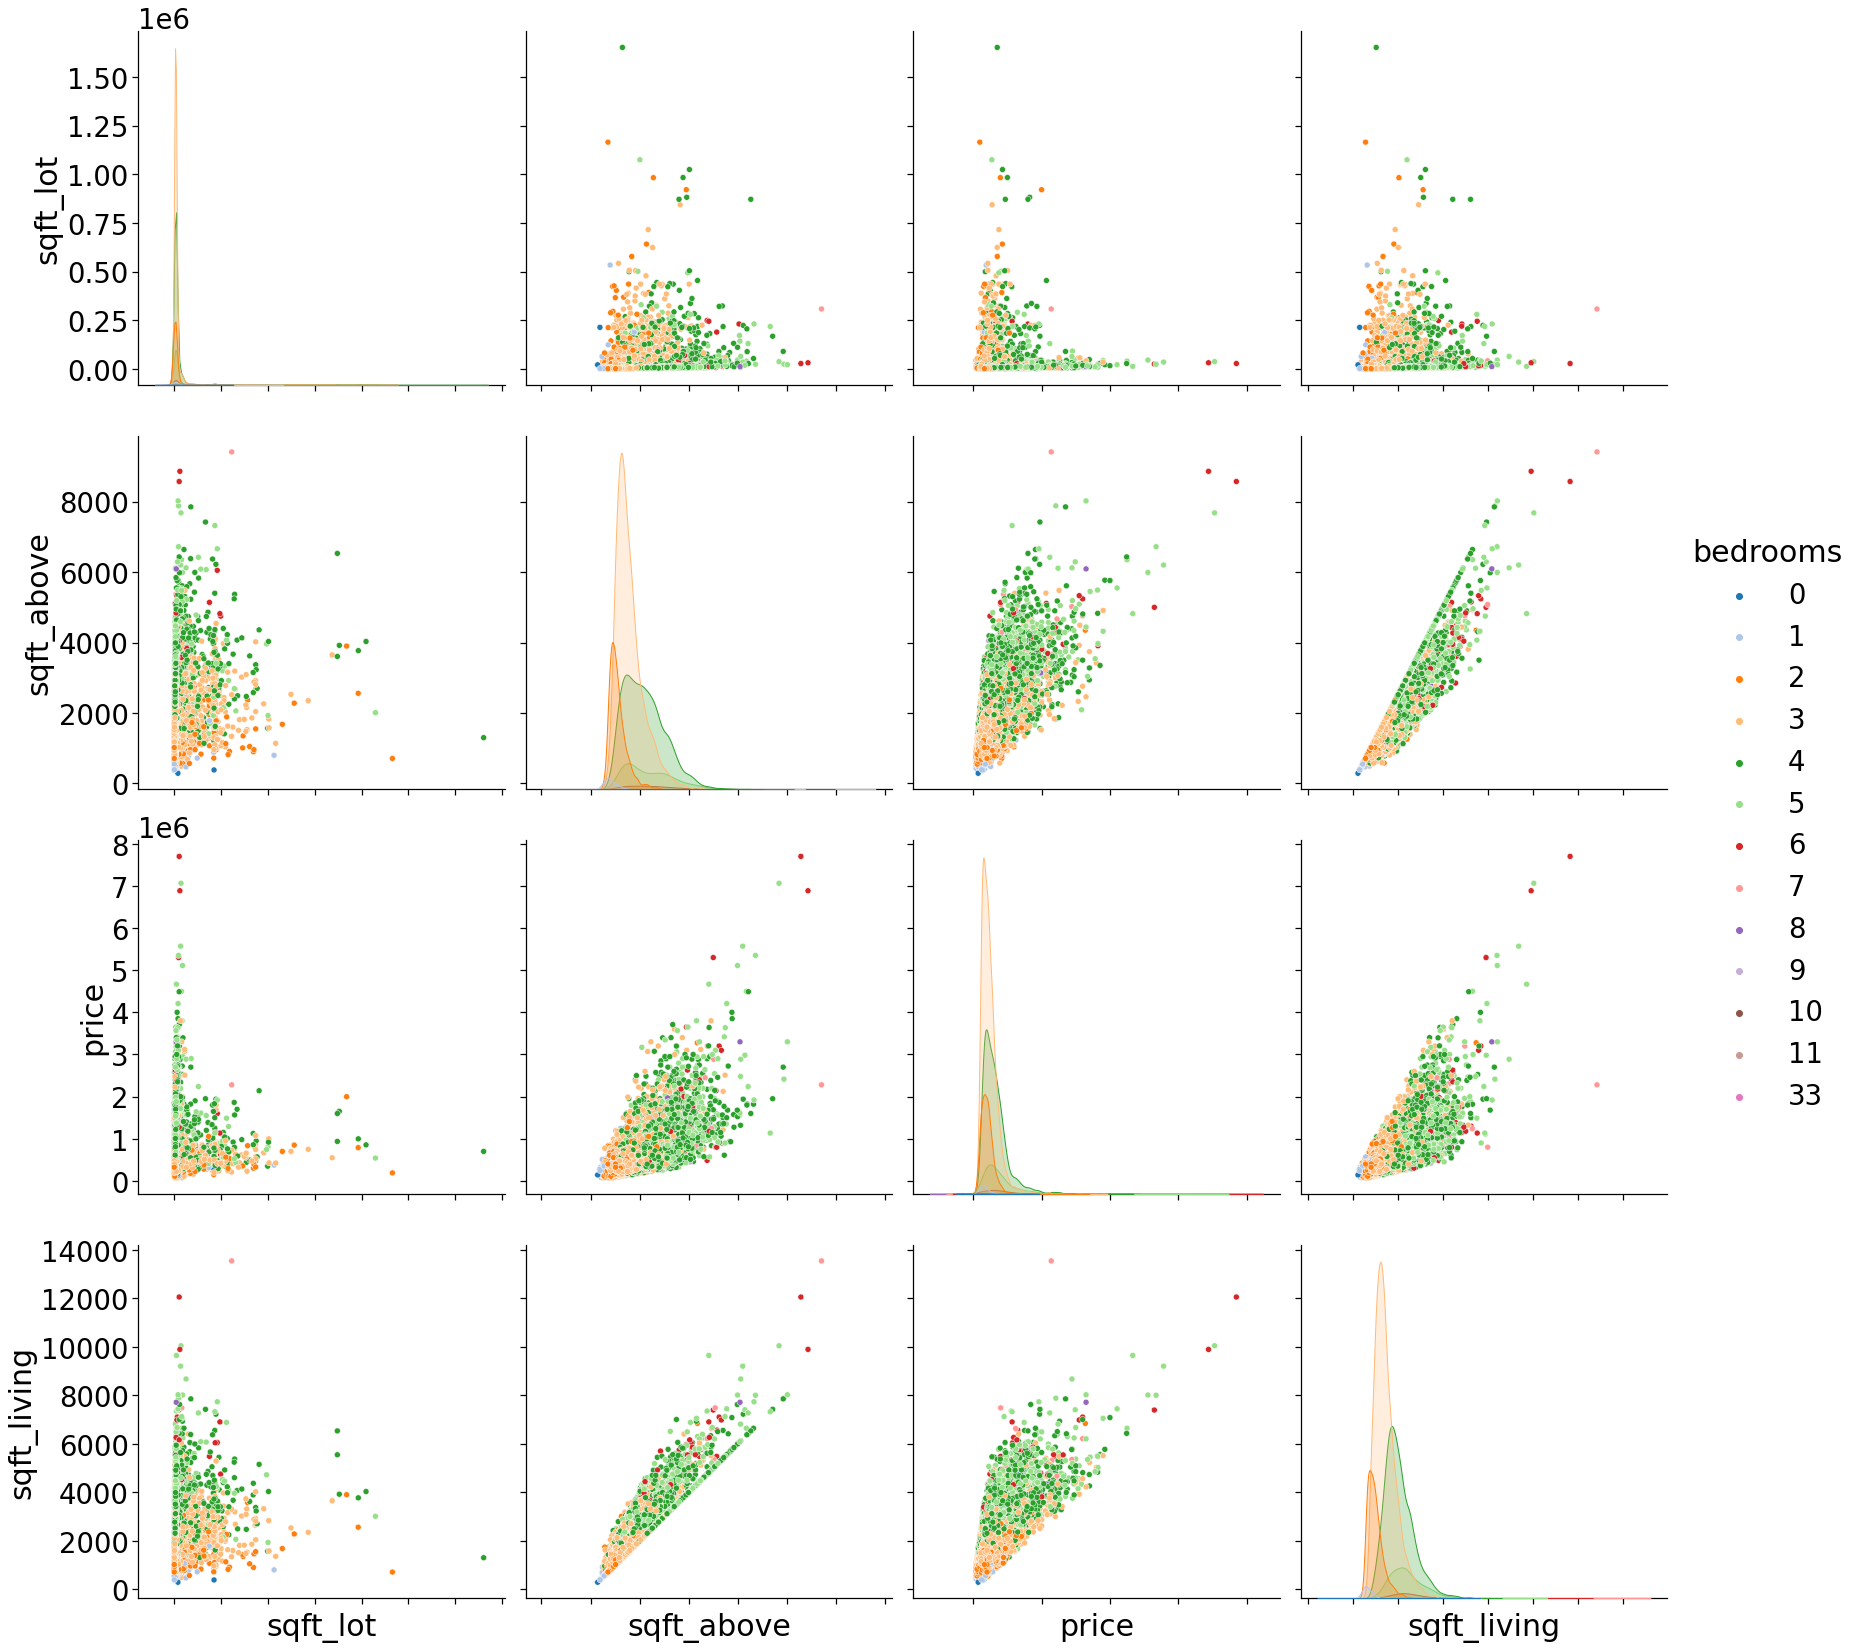

In [48]:
with sns.plotting_context("notebook",font_scale=2.5):
    g = sns.pairplot(dataset[['sqft_lot','sqft_above','price','sqft_living','bedrooms']], 
                 hue='bedrooms', palette='tab20',size=6)
g.set(xticklabels=[]);

In [53]:
X = dataset.iloc[:,1:].values
y = dataset.iloc[:,0].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 1/3, random_state = 0)

In [55]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

y_pred = regressor.predict(X_test)
y_pred

array([ 386540.99847832, 1516969.01534073,  538662.72575238, ...,
        526000.75505743,  313924.63663322,  400525.67314561])

In [75]:
dataset = pd.DataFrame({'Actual': y_test, 'Predicted': [f'{i:.10f}' for i in y_pred]}) 

In [76]:
dataset

,Actual,Predicted
0,297000.0,386540.9984783151
1,1578000.0,1516969.0153407298
2,562100.0,538662.7257523828
3,631500.0,584455.0377820276
4,780000.0,969718.8921676122
...,...,...
7200,378000.0,217441.7813887142
7201,275500.0,252551.7587221854
7202,592500.0,526000.7550574311
7203,284900.0,313924.6366332166


# 3.3.2 Задание